In [67]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('abalone_dataset.csv')
data_app = pd.read_csv('abalone_app.csv')

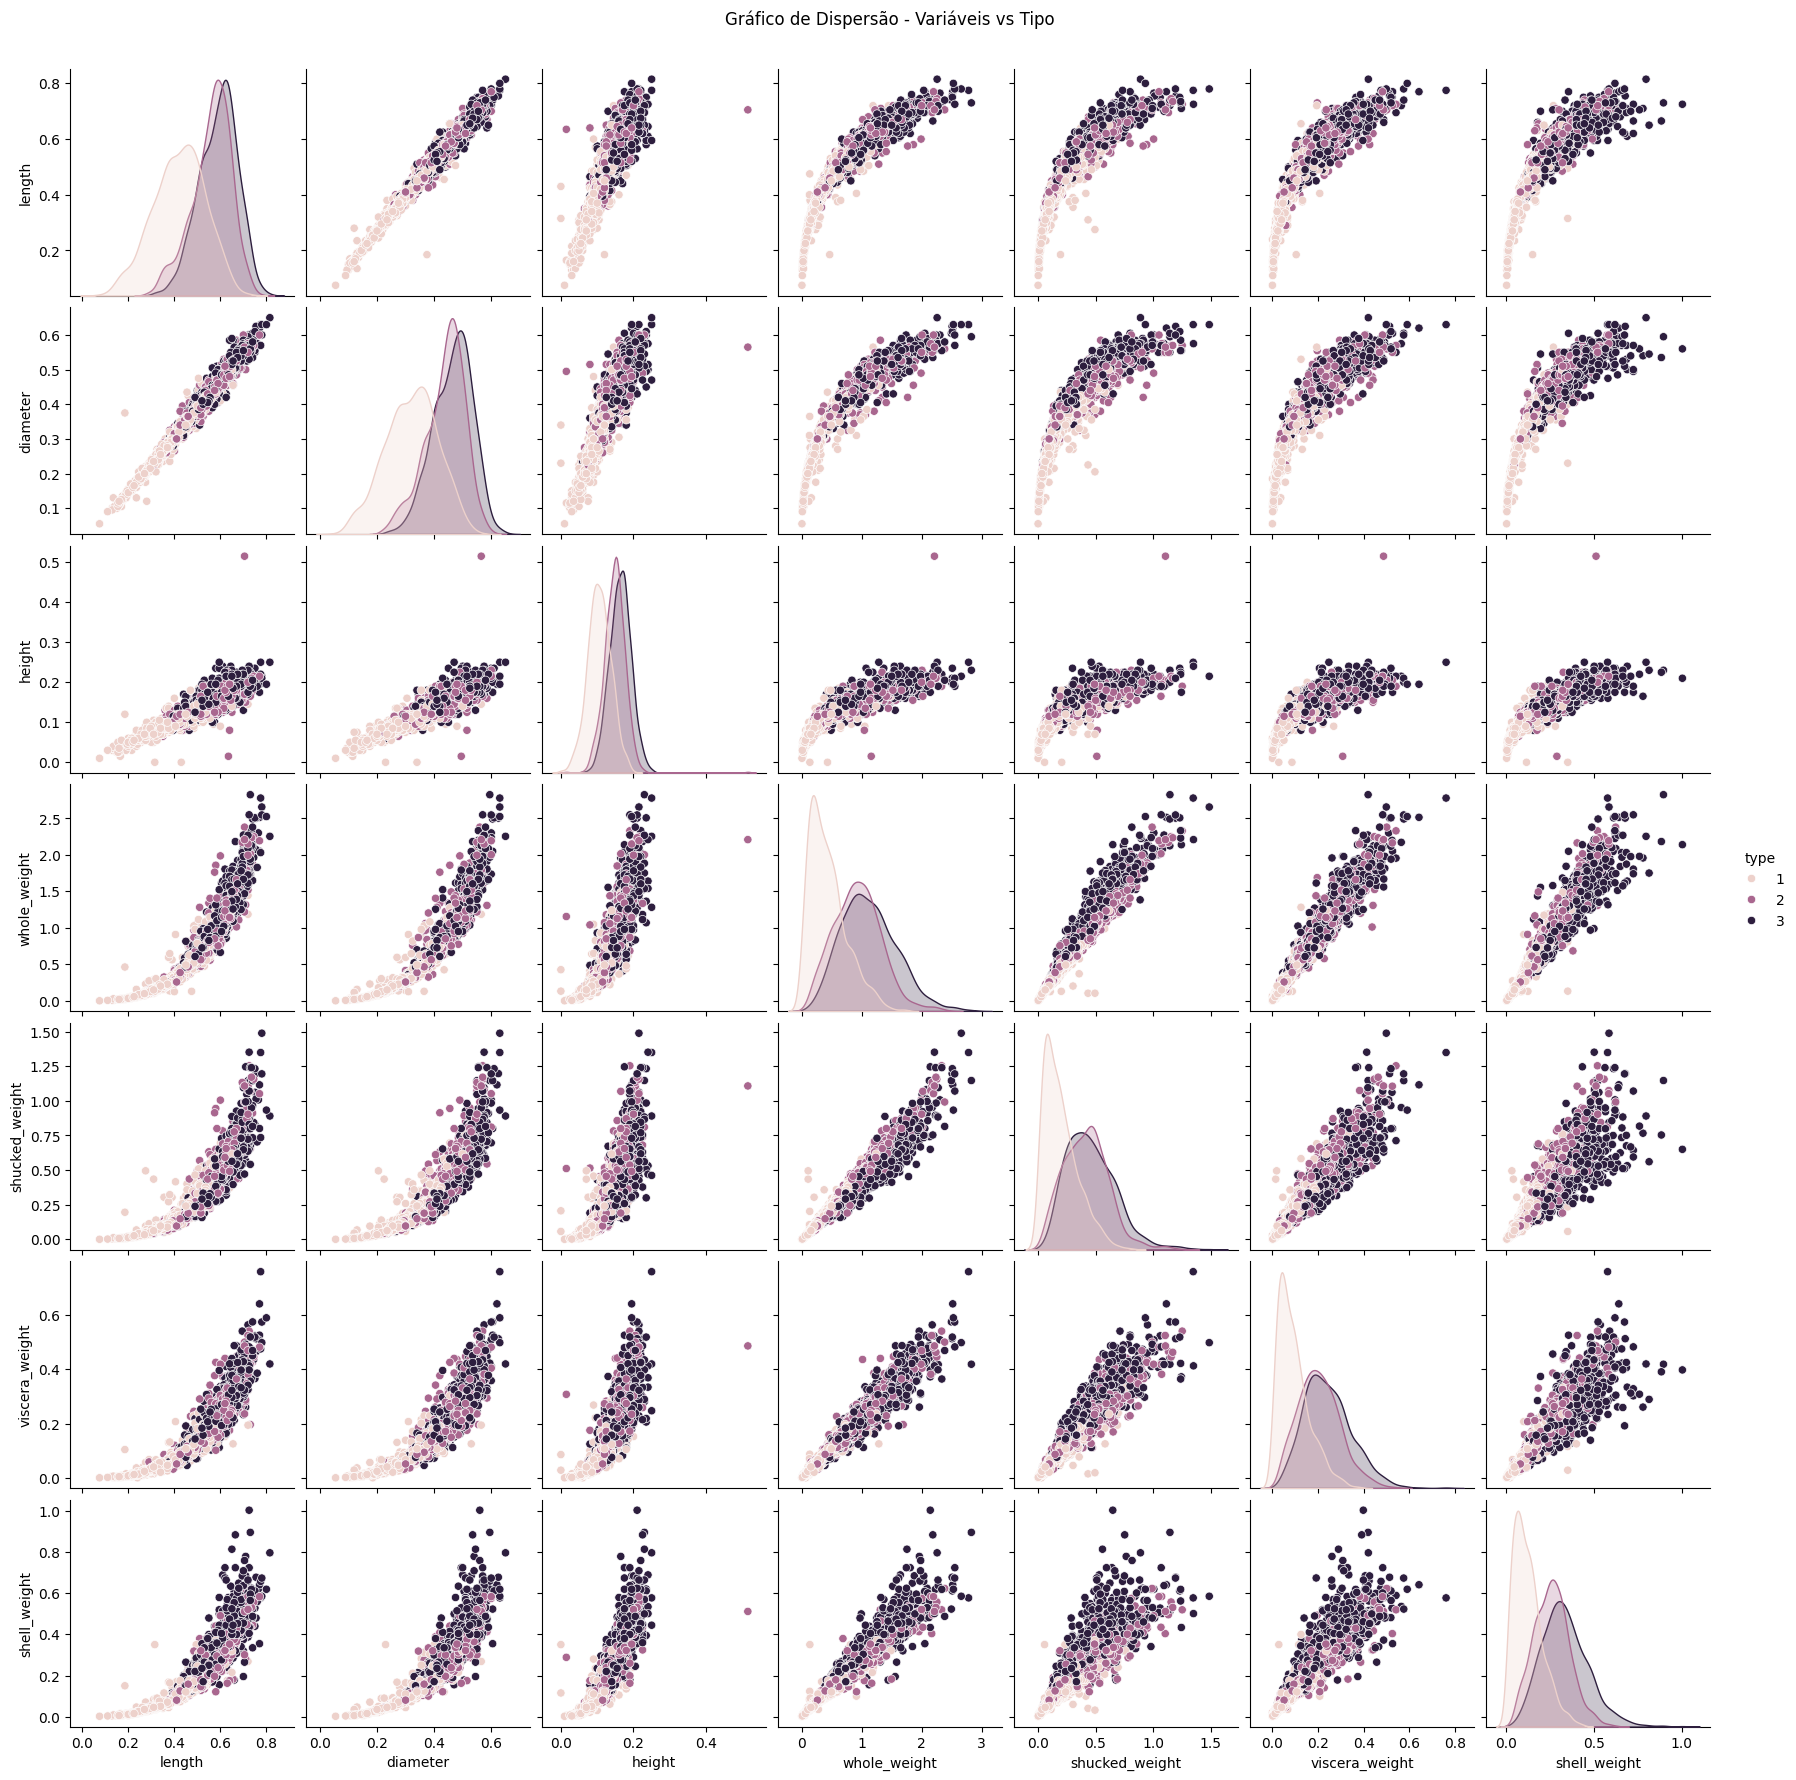

In [14]:
sns.pairplot(data, hue='type')
plt.suptitle('Gráfico de Dispersão - Variáveis vs Tipo', y=1.02)
plt.show()

In [70]:
feature_cols = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight']

X = data[feature_cols]
y = data.type

data_app = data_app[feature_cols]

In [ ]:
# RF tentativa
#  best: 67.6% (local)

skf = StratifiedKFold(n_splits=6, random_state=None, shuffle=False)
rf_classifier = RandomForestClassifier(n_estimators=100)
accuracies = []
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    rf_classifier.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = rf_classifier.predict(X.iloc[test_index])
    conf_matrix = confusion_matrix(y.iloc[test_index], y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
    cm_display.plot()
    plt.show()
    print(f"  RF Score: {accuracy_score(y.iloc[test_index], y_pred): .3f}")
    accuracies.append(accuracy_score(y.iloc[test_index], y_pred))

print(f"Mean RF Score: {np.mean(accuracies): .2f}")

y_pred = rf_classifier.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.show()

y_pred = rf_classifier.predict(data_app)

In [76]:
# KNN tentativa 1 e 2
#  best: 64.4% (servidor)

skf = StratifiedKFold(n_splits=6, random_state=None, shuffle=False)
neigh = KNeighborsClassifier(n_neighbors=17)
accuracies = []
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    neigh.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = neigh.predict(X.iloc[test_index])
    # conf_matrix = confusion_matrix(y.iloc[test_index], y_pred)
    # cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
    # cm_display.plot()
    # plt.show()
    print(f"  KNN Score: {accuracy_score(y.iloc[test_index], y_pred): .3f}")
    accuracies.append(accuracy_score(y.iloc[test_index], y_pred))

print(f"Mean KNN Score: {np.mean(accuracies): .2f}")
# y_pred = neigh.predict(X)
# conf_matrix = confusion_matrix(y, y_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
# cm_display.plot()
# plt.show()

y_pred = neigh.predict(data_app)

Fold 0:
  KNN Score:  0.651
Fold 1:
  KNN Score:  0.665
Fold 2:
  KNN Score:  0.643
Fold 3:
  KNN Score:  0.618
Fold 4:
  KNN Score:  0.585
Fold 5:
  KNN Score:  0.686
Mean KNN Score:  0.64


In [ ]:
# DT tentativa
#  best: 57.7% (local)

skf = StratifiedKFold(n_splits=6, random_state=None, shuffle=False)
regressor = DecisionTreeRegressor(random_state = 0)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    # print(f"  Test:  index={test_index}")
    regressor.fit(X.iloc[train_index], y.iloc[train_index])
    y_pred = regressor.predict(X.iloc[test_index])
    print(f"  RF Score: {accuracy_score(y.iloc[test_index], y_pred): .3f}")

In [39]:
# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/03_Validation.php"
#TODO Substituir pela sua chave aqui
DEV_KEY = "Careless Whisper"
# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")

 - Resposta do servidor:
 {"status":"success","dev_key":"Careless Whisper","accuracy":0.6440191387559808,"old_accuracy":0.5511961722488} 

